# Setup

## Look around

In [1]:
%ls

colab_extended_GPflow_pipeline.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
prepare_extended_grid_search_results.ipynb
prepare_reproducing_grid_search_results.ipynb


In [2]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

## Import Modules

### Standard imports

In [3]:
import pickle
import json

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [5]:
# root = '../backup_results'
root = '../results'

In [6]:
dataset = 'freesolv'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'reproducing'
assert grid_search_type in ['reproducing', 'extended']

## Titles, Units and Labels for datasets

In [7]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [8]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [9]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


## CHOOSE metric to display

In [10]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [11]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [12]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

In [13]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [14]:
best_params

{'1024ecfp-4': {'rf': {'rf__n_estimators': 500},
  'xgb': {'xgb__n_estimators': 100,
   'xgb__max_depth': 7,
   'xgb__learning_rate': 0.2},
  'krr': {'krr__alpha': 0.01},
  'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}}

In [15]:
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_params.json', 'r') as f:
#     best_params = json.load(f)

# with open(f'{root}/{dataset}_{smile_type}_random_search_best_cv_scores.json', 'r') as f:
#     cv_scores = json.load(f)
    
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_test_score.json', 'r') as f:
#     test_score = json.load(f)

Have a look at best parameters.

In [16]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 500},
 'xgb': {'xgb__n_estimators': 100,
  'xgb__max_depth': 7,
  'xgb__learning_rate': 0.2},
 'krr': {'krr__alpha': 0.01},
 'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [17]:
val_scores

{'1024ecfp-4': {'rf': {'fit_time': array([13.67025661, 13.5763967 ,  8.72875261]),
   'score_time': array([0.06913567, 0.06881833, 0.04356933]),
   'test_RMSE': array([-2.0652686 , -2.7198849 , -2.44871824]),
   'test_MAE': array([-1.32842992, -1.21508427, -1.41746871]),
   'test_R^2': array([0.68958705, 0.59216012, 0.61828794]),
   'test_pearson_r': array([0.84292259, 0.76972331, 0.81527464])},
  'xgb': {'fit_time': array([3.76285124, 3.72412491, 2.4172976 ]),
   'score_time': array([0.02843904, 0.02651   , 0.01561689]),
   'test_RMSE': array([-1.99913261, -2.17552875, -2.06884979]),
   'test_MAE': array([-1.34843504, -1.16502681, -1.30771738]),
   'test_R^2': array([0.70914941, 0.73907344, 0.72753158]),
   'test_pearson_r': array([0.84566209, 0.8647542 , 0.85898064])},
  'krr': {'fit_time': array([0.07818103, 0.10201812, 0.06083035]),
   'score_time': array([0.01396918, 0.01514673, 0.00926852]),
   'test_RMSE': array([-1.95879198, -2.31997877, -2.11971704]),
   'test_MAE': array([-1.

In [18]:
train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': array([15.67559266, 16.02740407,  9.75516558]),
   'score_time': array([0.06949973, 0.07967043, 0.04433656]),
   'test_RMSE': array([-2.77690922, -2.65768954, -1.76339967]),
   'train_RMSE': array([-0.7360855 , -0.72892177, -0.78293156]),
   'test_MAE': array([-1.42775852, -1.36813067, -1.12448039]),
   'train_MAE': array([-0.44268967, -0.44196825, -0.46686006]),
   'test_R^2': array([0.63116894, 0.61007431, 0.75311989]),
   'train_R^2': array([0.96155298, 0.96312065, 0.95920749]),
   'test_pearson_r': array([0.81025325, 0.7889467 , 0.87504886]),
   'train_pearson_r': array([0.98496308, 0.98547644, 0.98422494])},
  'xgb': {'fit_time': array([4.40001607, 4.39198852, 2.79412842]),
   'score_time': array([0.02725291, 0.02746487, 0.01554537]),
   'test_RMSE': array([-2.51279695, -2.08709943, -1.70853487]),
   'train_RMSE': array([-0.3954944 , -0.43837734, -0.43556319]),
   'test_MAE': array([-1.51294224, -1.21292516, -1.12651943]),
   'train_MAE': array([

Get the means over folds (cross_validate records the results as arrays even for one fold)

In [19]:
mean_val_scores = {features: {model: {record: np.abs(val_scores[features][model][record].mean()) for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
mean_train_test_scores = {features: {model: {record: np.abs(train_test_scores[features][model][record].mean()) for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

mean_train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': 13.819387435913086,
   'score_time': 0.06450223922729492,
   'test_RMSE': 2.3993328102691684,
   'train_RMSE': 0.7493129417520509,
   'test_MAE': 1.3067898623524632,
   'train_MAE': 0.4505059927017589,
   'test_R^2': 0.6647877150182208,
   'train_R^2': 0.961293704308392,
   'test_pearson_r': 0.8247496033044065,
   'train_pearson_r': 0.984888150698129},
  'xgb': {'fit_time': 3.862044334411621,
   'score_time': 0.023421049118041992,
   'test_RMSE': 2.102810418992084,
   'train_RMSE': 0.42314497569255743,
   'test_MAE': 1.2841289445620319,
   'train_MAE': 0.29734988428346687,
   'test_R^2': 0.7419218958330428,
   'train_R^2': 0.9876456618804891,
   'test_pearson_r': 0.8634585764183352,
   'train_pearson_r': 0.9943762846451496},
  'krr': {'fit_time': 0.07852904001871745,
   'score_time': 0.015253384908040365,
   'test_RMSE': 2.1222077868266744,
   'train_RMSE': 1.01413059699117,
   'test_MAE': 1.2658201252850467,
   'train_MAE': 0.7152661456146033,
   'te

In [20]:
std_val_scores = {features: {model: {record: val_scores[features][model][record].std() for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
std_train_test_scores = {features: {model: {record: train_test_scores[features][model][record].std() for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

std_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 2.3076424889321623,
   'score_time': 0.011977992031772905,
   'test_RMSE': 0.26855322066261805,
   'test_MAE': 0.08282149465052677,
   'test_R^2': 0.041174741402080994,
   'test_pearson_r': 0.03017995491289836},
  'xgb': {'fit_time': 0.6253720605559688,
   'score_time': 0.005644944078987859,
   'test_RMSE': 0.07253848104208606,
   'test_MAE': 0.07863919567640305,
   'test_R^2': 0.012322366023402994,
   'test_pearson_r': 0.00799462647634182},
  'krr': {'fit_time': 0.016884195612224283,
   'score_time': 0.0025393828464985286,
   'test_RMSE': 0.14774510186209644,
   'test_MAE': 0.04193680231151645,
   'test_R^2': 0.00720140432325303,
   'test_pearson_r': 0.004712088888678398},
  'gp': {'fit_time': 0.3883581154771111,
   'score_time': 0.005873573725228352,
   'test_RMSE': 0.16280496143417567,
   'test_MAE': 0.061223765065121595,
   'test_R^2': 0.011572346490645901,
   'test_pearson_r': 0.0061260979102285605}}}

In [21]:
mean_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 11.991801977157593,
   'score_time': 0.060507774353027344,
   'test_RMSE': 2.4112905795778308,
   'test_MAE': 1.3203276337118717,
   'test_R^2': 0.6333450372790219,
   'test_pearson_r': 0.8093068470084014},
  'xgb': {'fit_time': 3.301424582799276,
   'score_time': 0.023521979649861652,
   'test_RMSE': 2.0811703820283145,
   'test_MAE': 1.273726408872849,
   'test_R^2': 0.7252514767792566,
   'test_pearson_r': 0.8564656422655741},
  'krr': {'fit_time': 0.08034316698710124,
   'score_time': 0.012794812520345053,
   'test_RMSE': 2.1328292645114857,
   'test_MAE': 1.3061411926845305,
   'test_R^2': 0.7126702761913101,
   'test_pearson_r': 0.8560644145421757},
  'gp': {'fit_time': 3.168208678563436,
   'score_time': 0.050597031911214195,
   'test_RMSE': 2.1003559617890493,
   'test_MAE': 1.2237943549564063,
   'test_R^2': 0.7215357332904843,
   'test_pearson_r': 0.8626201290718131}}}

# Visualization

## Plotting options

In [22]:
column_order = ['1024ecfp-4']

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'Gaussian Process']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'Gaussian Process'
}

## Train metric

In [23]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,1024ecfp-4
gp,0.06
krr,1.01
rf,0.75
xgb,0.42


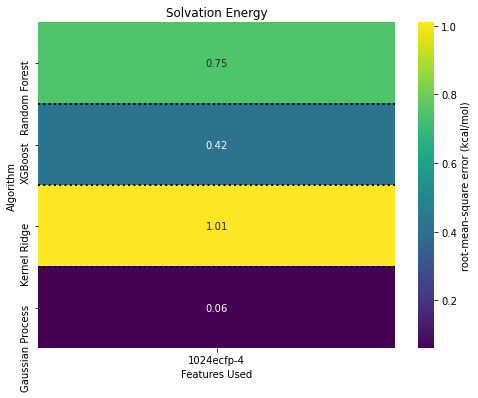

In [24]:
df = train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

In [25]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,1024ecfp-4
gp,2.10
krr,2.13
rf,2.41
xgb,2.08


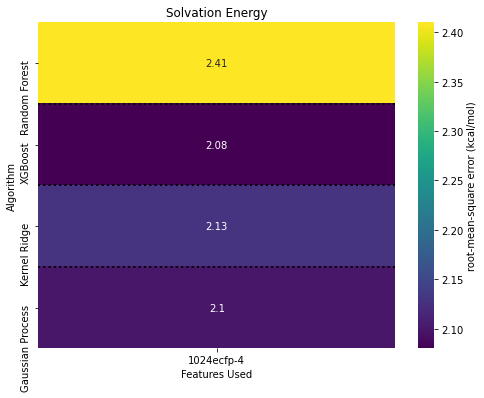

In [26]:
df = val_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Test metric

In [27]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,1024ecfp-4
gp,2.00
krr,2.12
rf,2.40
xgb,2.10


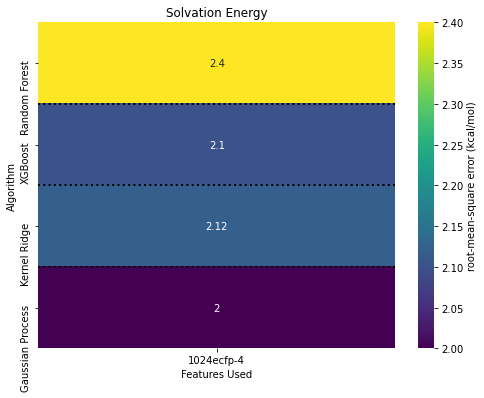

In [28]:
df = test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

# Creating a table with all the scores

## Train and test scores data frame

In [29]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,2.877426,0.014852,0.452299,0.023951,0.131191,0.011568,0.063051,0.001608,0.036615,0.000514
xgb,0.755138,0.005570,0.328527,0.019586,0.165596,0.014145,0.031266,0.000934,0.019218,0.000423
krr,0.022422,0.000993,0.277243,0.014669,0.072454,0.006850,0.017881,0.000379,0.008566,0.000298
gp,0.369969,0.005568,0.221836,0.000469,0.114742,0.000551,0.004311,0.000007,0.002436,0.000003


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [30]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,2.307642,0.011978,0.268553,0.082821,0.041175,0.030180
xgb,0.625372,0.005645,0.072538,0.078639,0.012322,0.007995
krr,0.016884,0.002539,0.147745,0.041937,0.007201,0.004712
gp,0.388358,0.005874,0.162805,0.061224,0.011572,0.006126


In [31]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.268553,0.082821,0.041175,0.030180
xgb,0.072538,0.078639,0.012322,0.007995
krr,0.147745,0.041937,0.007201,0.004712
gp,0.162805,0.061224,0.011572,0.006126


In [32]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [33]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [34]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.268553,0.082821,0.041175,0.030180
xgb,0.072538,0.078639,0.012322,0.007995
krr,0.147745,0.041937,0.007201,0.004712
gp,0.162805,0.061224,0.011572,0.006126


## All scores

In [35]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,2.877426,0.014852,0.452299,0.023951,0.131191,0.011568,0.063051,0.001608,0.036615,0.000514,0.268553,0.082821,0.041175,0.030180
xgb,0.755138,0.005570,0.328527,0.019586,0.165596,0.014145,0.031266,0.000934,0.019218,0.000423,0.072538,0.078639,0.012322,0.007995
krr,0.022422,0.000993,0.277243,0.014669,0.072454,0.006850,0.017881,0.000379,0.008566,0.000298,0.147745,0.041937,0.007201,0.004712
gp,0.369969,0.005568,0.221836,0.000469,0.114742,0.000551,0.004311,0.000007,0.002436,0.000003,0.162805,0.061224,0.011572,0.006126


In [36]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [37]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,2.877426,0.014852,0.023951,0.268553,0.452299,0.011568,0.082821,0.131191,0.001608,0.041175,0.063051,0.000514,0.030180,0.036615
xgb,0.755138,0.005570,0.019586,0.072538,0.328527,0.014145,0.078639,0.165596,0.000934,0.012322,0.031266,0.000423,0.007995,0.019218
krr,0.022422,0.000993,0.014669,0.147745,0.277243,0.006850,0.041937,0.072454,0.000379,0.007201,0.017881,0.000298,0.004712,0.008566
gp,0.369969,0.005568,0.000469,0.162805,0.221836,0.000551,0.061224,0.114742,0.000007,0.011572,0.004311,0.000003,0.006126,0.002436


## Presentable version

In [38]:
presentable_all_means = np.round(all_means, 3)
presentable_all_stds = np.round(all_stds, 3)

In [39]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

freesolv original reproducing

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,13.819,0.065,0.749,2.411,2.399,0.451,1.320,1.307,0.961,0.633,0.665,0.985,0.809,0.825
xgb,3.862,0.023,0.423,2.081,2.103,0.297,1.274,1.284,0.988,0.725,0.742,0.994,0.856,0.863
krr,0.079,0.015,1.014,2.133,2.122,0.715,1.306,1.266,0.929,0.713,0.737,0.969,0.856,0.865
gp,3.800,0.056,0.059,2.100,1.999,0.030,1.224,1.170,1.000,0.722,0.765,1.000,0.863,0.883


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,2.877,0.015,0.024,0.269,0.452,0.012,0.083,0.131,0.002,0.041,0.063,0.001,0.030,0.037
xgb,0.755,0.006,0.020,0.073,0.329,0.014,0.079,0.166,0.001,0.012,0.031,0.000,0.008,0.019
krr,0.022,0.001,0.015,0.148,0.277,0.007,0.042,0.072,0.000,0.007,0.018,0.000,0.005,0.009
gp,0.370,0.006,0.000,0.163,0.222,0.001,0.061,0.115,0.000,0.012,0.004,0.000,0.006,0.002


In [40]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,13.819 +/- 2.877,0.065 +/- 0.015,0.749 +/- 0.024,2.411 +/- 0.269,2.399 +/- 0.452,0.451 +/- 0.012,1.32 +/- 0.083,1.307 +/- 0.131,0.961 +/- 0.002,0.633 +/- 0.041,0.665 +/- 0.063,0.985 +/- 0.001,0.809 +/- 0.03,0.825 +/- 0.037
xgb,3.862 +/- 0.755,0.023 +/- 0.006,0.423 +/- 0.02,2.081 +/- 0.073,2.103 +/- 0.329,0.297 +/- 0.014,1.274 +/- 0.079,1.284 +/- 0.166,0.988 +/- 0.001,0.725 +/- 0.012,0.742 +/- 0.031,0.994 +/- 0.0,0.856 +/- 0.008,0.863 +/- 0.019
krr,0.079 +/- 0.022,0.015 +/- 0.001,1.014 +/- 0.015,2.133 +/- 0.148,2.122 +/- 0.277,0.715 +/- 0.007,1.306 +/- 0.042,1.266 +/- 0.072,0.929 +/- 0.0,0.713 +/- 0.007,0.737 +/- 0.018,0.969 +/- 0.0,0.856 +/- 0.005,0.865 +/- 0.009
gp,3.8 +/- 0.37,0.056 +/- 0.006,0.059 +/- 0.0,2.1 +/- 0.163,1.999 +/- 0.222,0.03 +/- 0.001,1.224 +/- 0.061,1.17 +/- 0.115,1.0 +/- 0.0,0.722 +/- 0.012,0.765 +/- 0.004,1.0 +/- 0.0,0.863 +/- 0.006,0.883 +/- 0.002


In [41]:
print(dataset, smile_type, grid_search_type)
print(metric, datasets_to_units[dataset])
presentable_all_means_stds_rmse = presentable_all_means_stds[['train_RMSE', 'val_RMSE', 'test_RMSE']]
display(presentable_all_means_stds_rmse)

freesolv original reproducing
RMSE (kcal/mol)


,train_RMSE,val_RMSE,test_RMSE
rf,0.749 +/- 0.024,2.411 +/- 0.269,2.399 +/- 0.452
xgb,0.423 +/- 0.02,2.081 +/- 0.073,2.103 +/- 0.329
krr,1.014 +/- 0.015,2.133 +/- 0.148,2.122 +/- 0.277
gp,0.059 +/- 0.0,2.1 +/- 0.163,1.999 +/- 0.222


# Save results to csv files

## All results

In [42]:
presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)

In [43]:
presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)

In [44]:
presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)

## RMSE results (means +- stds)

In [45]:
presentable_all_means_stds_rmse.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds_rmse.csv', index=True)